In [13]:
%load_ext autoreload
%autoreload 2

import CustomModule as cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
df = cm.LoadHousingData()

In [3]:
df.head().columns.tolist()

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'cost']

## EDA

In [4]:
import pandas as pd

df = pd.read_csv('dsc-phase-2-project/data/kc_house_data.csv')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Columns that aren't needed

drop_cols = ['date',
             'view',
             'sqft_above',
             'sqft_basement',
             'yr_renovated', 
             'sqft_living15',
             'sqft_lot15']

df.drop(columns=drop_cols,inplace=True)

In [7]:
seventyfive = df.describe().price[6]
fifty = df.describe().price[5]
twentyfive = df.describe().price[4]

seventyfive

645000.0

In [8]:
df['price_bin'] = [(3 if x > seventyfive
                      else (2 if x > fifty
                           else (1 if x > twentyfive
                                else 0))) 
                   for x in df['price']]

AttributeError: 'PathCollection' object has no property 'xlabel'

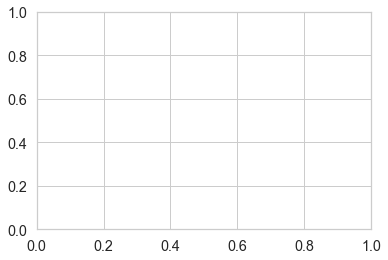

In [9]:
import seaborn as sns

sns.scatterplot(x='lat',
                y='long',
                hue='price_bin',
                xlabel='TEST',
                data=df)

In [ ]:
sns.scatterplot(x='lat',
                y='long',
                hue='zipcode',
                data=df)

In [ ]:
df.head()

In [ ]:
# All NaN data is in waterfront column
df.info()

In [ ]:

"""newest house is 2015
Waterfront: is 0-1, NaN values can be 0 given extremely low prportion of waterfront properties
    
"""
df.describe().price

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(df)

## Baseline Regression

In [11]:
cm.BaselineModel(df, y='price', xlist=['bedrooms', 'grade','condition'])

TypeError: mean_squared_error() got an unexpected keyword argument 'squared'

In [12]:
cm.BaselineModel(df, y='cost', xlist=['bedrooms', 'grade','condition'])

KeyError: 'cost'

## Scatters of Interest

### Housing Volume

In [ ]:
cm.PlotScatter(df, xvar='bedrooms', yvar='cost')

In [ ]:
cm.PlotScatter(df, xvar='bedrooms', yvar='price')

### Grade

In [ ]:
cm.PlotScatter(df, xvar='grade', yvar='price')

In [ ]:
cm.PlotScatter(df, xvar='grade', yvar='cost')

## Histograms of Interest

### Price 

AttributeError: module 'seaborn' has no attribute 'histplot'

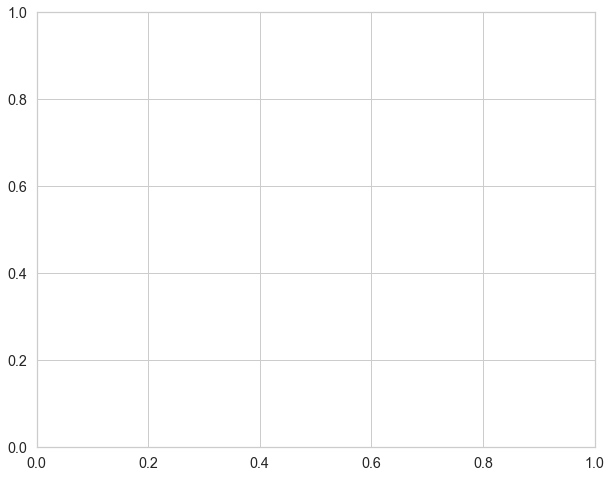

In [10]:
cm.PlotHist(df, xvar='price')

In [ ]:
cm.PlotHist(df, xvar='cost')

## Cost of Building House
https://www.daveramsey.com/blog/how-much-does-it-cost-to-build-a-house
Abou $153 per sqft in 2017